### Amate Shivdas Maruti

### Black Friday Sales prediction from Analytics Vidhya


### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df=pd.read_csv('train.csv')

In [54]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [56]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [57]:
corr=df.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


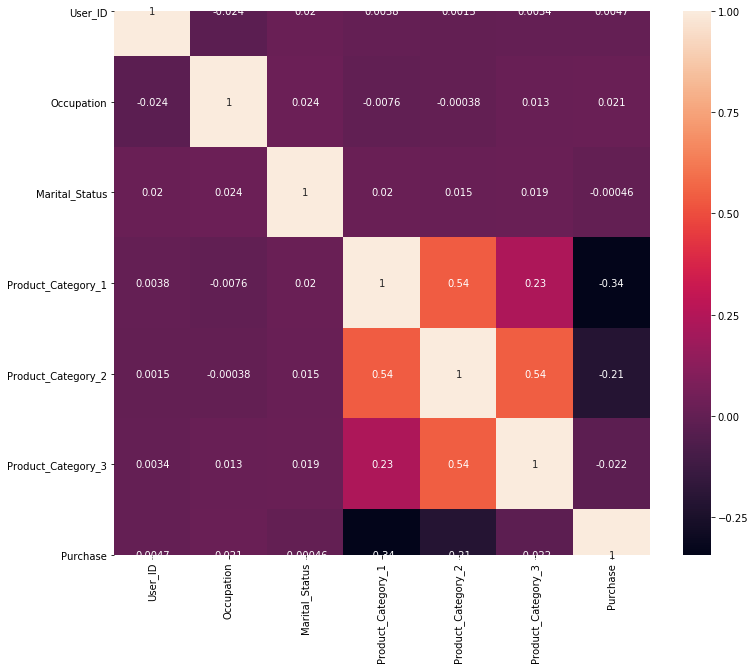

In [58]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

In [59]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [60]:
df = pd.get_dummies(df, columns=['Age','Stay_In_Current_City_Years'])

In [61]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()
lable_encoder.fit(df["Gender"])
lable_encoder.classes_
df["Gender"] = lable_encoder.transform(df['Gender'])

In [62]:
lable_encoder.fit(df["City_Category"])
lable_encoder.classes_
df["City_Category"] = lable_encoder.transform(df['City_Category'])

In [63]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [64]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(8)

In [65]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [66]:
df['Product_Category_3']=df['Product_Category_3'].fillna(16)

In [67]:
df.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,10,0,0,3,8.0,16.0,8370,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,10,0,0,1,6.0,14.0,15200,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,10,0,0,12,8.0,16.0,1422,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,10,0,0,12,14.0,16.0,1057,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,16,2,0,8,8.0,16.0,7969,...,0,0,0,0,1,0,0,0,0,1


In [77]:
x =df.drop(['User_ID', 'Product_ID', 'Purchase', 'Marital_Status', 'Age_26-35', 'Product_Category_3', 'Product_Category_2'], axis=1)

In [78]:
y=df['Purchase']

In [79]:
from sklearn.model_selection import train_test_split


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=80, random_state=100)

## Model fiting

## K-nearest neighbors Regressor

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [89]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

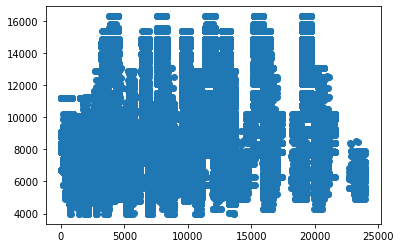

In [90]:
plt.scatter(y_test, y_pred)

In [91]:
MSE = np.sqrt( mean_squared_error(y_test,y_pred))
RMSE = sqrt(MSE)
print("RMSE is",RMSE)

RMSE is 66.65587610321116


In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.21763035801934982

## Using Multiple linear regression

In [93]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred1=lm.predict(x_test)

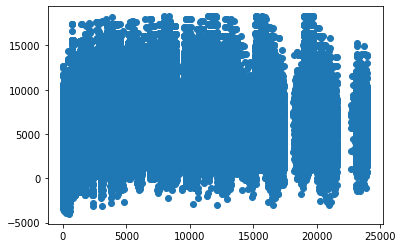

In [95]:
plt.scatter(y_test, y_pred1)

In [96]:
MSE = np.sqrt( mean_squared_error(y_test,y_pred1))
RMSE = sqrt(MSE)
print("RMSE is",RMSE)

RMSE is 75.07667867211755


## Test data

In [97]:
td=pd.read_csv('test.csv')

In [98]:
td.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [99]:
td = pd.get_dummies(td, columns=['Age','Stay_In_Current_City_Years'])

In [100]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()
lable_encoder.fit(td["Gender"])
lable_encoder.classes_
td["Gender"] = lable_encoder.transform(td['Gender'])

In [102]:
lable_encoder.fit(td["City_Category"])
lable_encoder.classes_
td["City_Category"] = lable_encoder.transform(td['City_Category'])

In [104]:
td["Product_Category_2"].mode()

0    8.0
dtype: float64

In [106]:
td['Product_Category_3'].mode()

0    16.0
dtype: float64

In [107]:
td['Product_Category_3']=td['Product_Category_3'].fillna(16)

In [108]:
td["Product_Category_2"]=td["Product_Category_2"].fillna(8)

In [113]:
X1 =td.drop(['User_ID', 'Product_ID', 'Marital_Status', 'Age_26-35', 'Product_Category_3', 'Product_Category_2'], axis=1)

In [114]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train , y_train)
y_pred_test = knn.predict(X1)

In [115]:
y_pred_test[0:5]

array([14084.8,  4606.8,  6348.6,  7277.8,  7277.8])

In [116]:
black_friday_sale = pd.read_csv('test.csv')

User_ID = black_friday_sale['User_ID']

Product_ID = black_friday_sale['Product_ID']

In [117]:
submission=pd.DataFrame({'Purchase':y_pred_test, 'User_ID':User_ID,'Product_ID':Product_ID})
submission.to_csv("Black friday sale prediction.csv",index=False)